In [1]:
%load_ext snakeviz

In [2]:
from qaoa_and_tdvp import QAOA, tdvp_optimize_qaoa, scipy_optimize, QAOAResult, Qobj
from MaxCut import MaxCut
from qutip import tensor
from qutip.qip.operations import expand_operator, rz
from benchmark import get_all_connected, get_connected_rn_graph, get_rn_qubo, select_if_connected, Benchmark
from qutip.parallel import parallel_map, serial_map
from itertools import combinations_with_replacement
from multiprocessing import Value
import pickle
import numpy as np

In [3]:
p = 2
n=4
seed = 42
with open(f"./instances/n{n}_graphs.p","rb") as f:
    graphs = pickle.load(f)

In [4]:
index = 5#np.random.randint(0,len(graphs)); print(index)

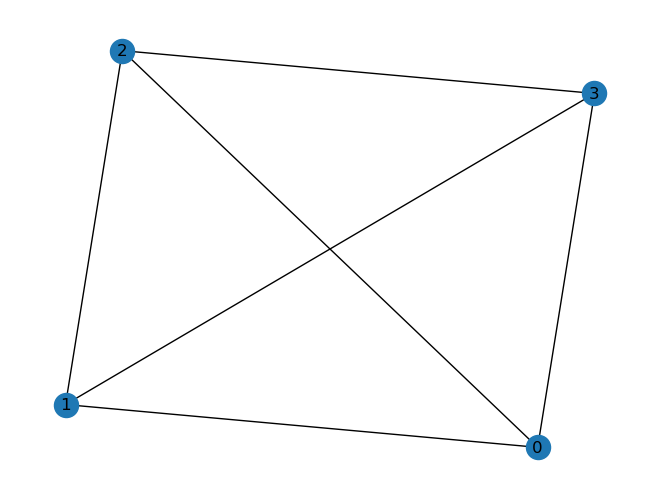

In [5]:
instance = MaxCut(graphs[index])
qaoa = QAOA(qubo=instance.qubo, p=p, mapping=serial_map)
delta = tuple(1 for _ in range(2 * qaoa.p))

In [7]:
%prun -D ./tmp/metric_profile.prof qaoa.gram(delta)

 
*** Profile stats marshalled to file './tmp/metric_profile.prof'.


         33696950 function calls (32219404 primitive calls) in 24.179 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   790550    2.041    0.000    2.041    0.000 {method 'reduce' of 'numpy.ufunc' objects}
1838597/1301541    1.324    0.000    7.004    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
   285256    1.064    0.000    1.711    0.000 fastsparse.py:30(__init__)
   134264    1.035    0.000   15.319    0.000 qobj.py:189(__init__)
   656470    1.008    0.000    3.376    0.000 fromnumeric.py:69(_wrapreduction)
    70392    0.695    0.000    1.994    0.000 _compressed.py:136(check_format)
   656470    0.553    0.000    3.929    0.000 fromnumeric.py:2933(prod)
   161152    0.541    0.000    1.474    0.000 _sputils.py:132(get_index_dtype)
  3732374    0.500    0.000    0.873    0.000 {built-in method builtins.isinstance}
    33520    0.481    0.000    1.290    0.000 _coo.py:265(_check)
   95

In [44]:
res = tdvp_optimize_qaoa(
    qaoa,
    delta,
    .1,
    int_mode="euler",
    rhs_mode="qaoa",
    grad_tol=0.1,
    max_iter=300,
)
print(res)

KeyboardInterrupt: 

In [41]:
sci_res = scipy_optimize(qaoa, delta)
sci_res


        scipy_cobyla terminated with sucess with message
        "Optimization terminated successfully."
        This took 5.25 seconds
        
            optimal parameters: [1.56733882 0.78449255 1.82667484 1.07586705]
                 optimal value: 17.261663823713175
        maximal ground overlap: 0.4518900748808219
           number of fun calls: 260
               number of steps: None
               number of gates: 7280
        